# Demo example: Analysis

This example is the continuation of the previous example: [filling gaps and missing observations](https://metobs-toolkit.readthedocs.io/en/latest/examples/filling_example.html). This example serves as an introduction to the Analysis module.

In [1]:
import metobs_toolkit

your_dataset = metobs_toolkit.Dataset()
your_dataset.update_settings(
    input_data_file=metobs_toolkit.demo_datafile, # path to the data file
    input_metadata_file=metobs_toolkit.demo_metadatafile,
    template_file=metobs_toolkit.demo_template,
)

#Import the data
your_dataset.import_data_from_file()

#Coarsen to 15-minutes frequencies
your_dataset.coarsen_time_resolution(freq='15T')

#Apply default quality control
your_dataset.apply_quality_control(obstype='temp') #we use the default settings in this example

#Interpret the outliers as missing observations and gaps.
your_dataset.convert_outliers_to_gaps()

#Fill gaps by interpolation
your_dataset.interpolate_gaps(obstype='temp', max_consec_fill=20)


Warning! The current gaps will be removed and new gaps are formed!
Warning! The current gaps are defined at a resolution different from the assumed import resolution!
Warning! Cannot fill temp-gap of vlinder05 for 2022-09-01 00:00:00+00:00 --> 2022-09-01 05:45:00+00:00, duration: 0 days 05:45:00, because leading record is not valid.
Warning! Cannot fill temp-gap of vlinder05 for 2022-09-13 20:00:00+00:00 --> 2022-09-15 23:45:00+00:00, duration: 2 days 03:45:00, because trailing record is not valid.


fill    fill_method  \
name      datetime                                          
vlinder01 2022-09-01 02:30:00+00:00    NaN        leading   
          2022-09-01 02:45:00+00:00  16.80  interpolation   
          2022-09-01 03:00:00+00:00    NaN       trailing   
          2022-09-01 05:30:00+00:00    NaN        leading   
          2022-09-01 05:45:00+00:00  15.15  interpolation   
...                                    ...            ...   
vlinder28 2022-09-15 07:15:00+00:00    NaN  interpolation   
          2022-09-15 07:30:00+00:00    NaN  interpolation   
          2022-09-15 07:45:00+00:00    NaN  interpolation   
          2022-09-15 08:00:00+00:00    NaN  interpolation   
          2022-09-15 08:15:00+00:00    NaN       trailing   

                                                                   msg  \
name      datetime                                                       
vlinder01 2022-09-01 02:30:00+00:00                                 ok   
          2022-09-01 02:45:00+00:00                                 ok   
          2022-09-01 03:00:00+00:00                                 ok   
          2022-09-01 05:30:00+00:00                                 ok   
          2022-09-01 05:45:00+00:00                                 ok   
...                                                                ...   
vlinder28 2022-09-15 07:15:00+00:00  Permitted_by_max_consecutive_fill   
          2022-09-15 07:30:00+00:00  Permitted_by_max_consecutive_fill   
          2022-09-15 07:45:00+00:00  Permitted_by_max_consecutive_fill   
          2022-09-15 08:00:00+00:00  Permitted_by_max_consecutive_fill   
          2022-09-15 08:15:00+00:00                                 ok   

                                                                                gap_ID  
name      datetime                                                                      
vlinder01 2022-09-01 02:30:00+00:00  vlinder01;2022-09-01 02:45:00+00:00;2022-09-01...  
          2022-09-01 02:45:00+00:00  vlinder01;2022-09-01 02:45:00+00:00;2022-09-01...  
          2022-09-01 03:00:00+00:00  vlinder01;2022-09-01 02:45:00+00:00;2022-09-01...  
          2022-09-01 05:30:00+00:00  vlinder01;2022-09-01 05:45:00+00:00;2022-09-01...  
          2022-09-01 05:45:00+00:00  vlinder01;2022-09-01 05:45:00+00:00;2022-09-01...  
...                                                                                ...  
vlinder28 2022-09-15 07:15:00+00:00  vlinder28;2022-09-15 01:45:00+00:00;2022-09-15...  
          2022-09-15 07:30:00+00:00  vlinder28;2022-09-15 01:45:00+00:00;2022-09-15...  
          2022-09-15 07:45:00+00:00  vlinder28;2022-09-15 01:45:00+00:00;2022-09-15...  
          2022-09-15 08:00:00+00:00  vlinder28;2022-09-15 01:45:00+00:00;2022-09-15...  
          2022-09-15 08:15:00+00:00  vlinder28;2022-09-15 01:45:00+00:00;2022-09-15...  

[7991 rows x 4 columns]

## Creating an Analysis

The built-in analysis functionality is centered around the [*Analysis*](https://metobs-toolkit.readthedocs.io/en/latest/reference/analysis.html) class. First, create an *Analysis* object from a Dataset.

In [2]:
your_dataset.convert_filled_to_obs() #convert fillded values to observations
analysis = metobs_toolkit.Analysis(your_dataset)

analysis

Analysis instance containing: 
     *28 stations 
     *['humidity', 'precip', 'precip_sum', 'pressure', 'pressure_at_sea_level', 'temp', 'wind_direction', 'wind_gust', 'wind_speed', 'radiation_temp'] observation types 
     *364320 observation records 
     *0 records labeled as outliers 
     *125 gaps 
     *records range: 2022-09-01 00:00:00+00:00 --> 2022-09-15 23:45:00+00:00 (total duration:  14 days 23:45:00) 
     *time zone of the records: UTC 
     *Coordinates are available for all stations.

## Analysis methods

An overview of the available analysis methods can be seen in the documentation of the ``Analysis`` class. The relevant methods depend on your data and your interests. As an example, a demonstration of the filter and diurnal cycle of the demo data.

### Filtering data

It is common to filter your data according to specific meteorological phenomena or periods in time. To do this you can use the ``get_full_dataframe()`` and ``set_data()`` methods.

In [3]:
#Goal: filter to non-windy afternoons in the Autumn.

#1. Get a pandas dataframe to filter
to_filter = analysis.get_full_dataframe()
to_filter

#2. Use pandas methods to filter the dataframe

to_filter = to_filter.set_index(['name', 'datetime', 'obstype']) #set meaningful index
autumn_afternoon_data = to_filter[(to_filter['season'] == 'autumn') &
                                        (to_filter['hour']>=14) &
                                        (to_filter['hour']<=18)]

autumn_afternoon_data = autumn_afternoon_data.unstack(level='obstype') #create columns for each obstype (long to wide transformation)
#filter per station, for non-windy conditions
non_windy_autumn_afternoons_data = autumn_afternoon_data[(autumn_afternoon_data[('value', 'wind_speed')] <= 2.5)]
#unstack the obstype columns (wide to long transformation)
non_windy_autumn_afternoons_data = non_windy_autumn_afternoons_data.stack()

non_windy_autumn_afternoons_data

value  minute  \
name      datetime                  obstype                                   
vlinder01 2022-09-01 18:00:00+00:00 humidity                   47.0     0.0   
                                    precip                      0.0     0.0   
                                    precip_sum                  0.0     0.0   
                                    pressure               101453.0     0.0   
                                    pressure_at_sea_level  101717.0     0.0   
...                                                             ...     ...   
vlinder28 2022-09-15 18:45:00+00:00 pressure_at_sea_level  101266.0    45.0   
                                    temp                       15.7    45.0   
                                    wind_direction             15.0    45.0   
                                    wind_gust                   8.1    45.0   
                                    wind_speed                  0.8    45.0   

                                                           hour      month  \
name      datetime                  obstype                                  
vlinder01 2022-09-01 18:00:00+00:00 humidity               18.0  September   
                                    precip                 18.0  September   
                                    precip_sum             18.0  September   
                                    pressure               18.0  September   
                                    pressure_at_sea_level  18.0  September   
...                                                         ...        ...   
vlinder28 2022-09-15 18:45:00+00:00 pressure_at_sea_level  18.0  September   
                                    temp                   18.0  September   
                                    wind_direction         18.0  September   
                                    wind_gust              18.0  September   
                                    wind_speed             18.0  September   

                                                             year  \
name      datetime                  obstype                         
vlinder01 2022-09-01 18:00:00+00:00 humidity               2022.0   
                                    precip                 2022.0   
                                    precip_sum             2022.0   
                                    pressure               2022.0   
                                    pressure_at_sea_level  2022.0   
...                                                           ...   
vlinder28 2022-09-15 18:45:00+00:00 pressure_at_sea_level  2022.0   
                                    temp                   2022.0   
                                    wind_direction         2022.0   
                                    wind_gust              2022.0   
                                    wind_speed             2022.0   

                                                           day_of_year  \
name      datetime                  obstype                              
vlinder01 2022-09-01 18:00:00+00:00 humidity                     244.0   
                                    precip                       244.0   
                                    precip_sum                   244.0   
                                    pressure                     244.0   
                                    pressure_at_sea_level        244.0   
...                                                                ...   
vlinder28 2022-09-15 18:45:00+00:00 pressure_at_sea_level        258.0   
                                    temp                         258.0   
                                    wind_direction               258.0   
                                    wind_gust                    258.0   
                                    wind_speed                   258.0   

                                                          week_of_year  \
name      datetime                  obstype                              
vlinder01 

In [4]:
#3. Update the Analysis data to these filtered data
analysis.set_data(df = non_windy_autumn_afternoons_data)
analysis

Analysis instance containing: 
     *28 stations 
     *['humidity', 'precip', 'precip_sum', 'pressure', 'pressure_at_sea_level', 'temp', 'wind_direction', 'wind_gust', 'wind_speed', 'radiation_temp'] observation types 
     *47817 observation records 
     *0 records labeled as outliers 
     *125 gaps 
     *records range: 2022-09-01 14:00:00+00:00 --> 2022-09-15 18:45:00+00:00 (total duration:  14 days 04:45:00) 
     *time zone of the records: UTC 
     *Coordinates are available for all stations.

## Diurnal cycle 

To make a diurnal cycle plot of your Analysis use the ``get_diurnal_statistics()`` method:

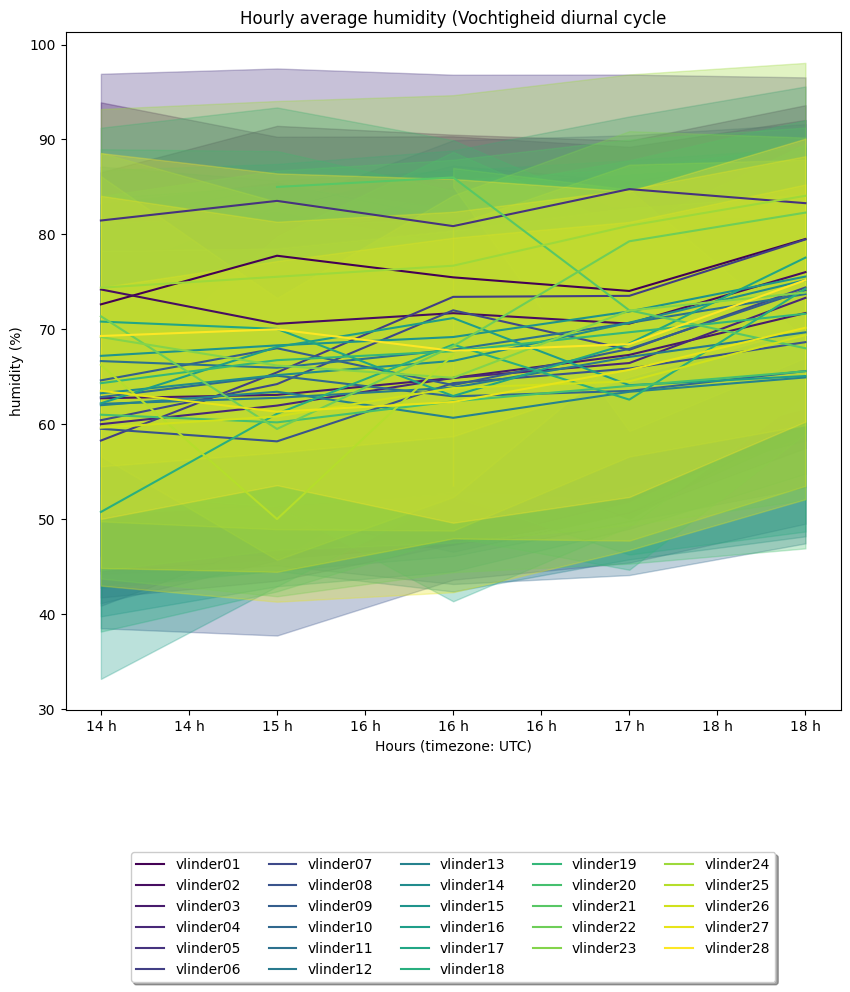

In [5]:
dirunal_statistics = analysis.get_diurnal_statistics(colorby='name',
                                                   obstype='humidity', 
                                                   plot=True,
                                                   errorbands=True,
                                                  )
#Note that in this example statistics are computed for a short period and only for the non-windy autumn afternoons.

## Analysis exercise

For a more detailed reference you can use this [Analysis exercise](https://github.com/vergauwenthomas/MetObs_toolkit/blob/4d5a35954eb8ff153eb0d9e9c8a34cee7e3c50f4/fairness_demo_exercises/Urban_analysis_excercise_04.ipynb), which was created in the context of the [COST FAIRNESS](https://www.cost.eu/actions/CA20108/) summer school 2023 in Ghent.